In [1]:
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(as_frame=True, return_X_y=True)

Scale the features as we did with the hierarchical clustering demo

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

Build our decision tree model for the purposes of extracting the feature importances which we can use to update the feature weighting in the hierarchical clustering demo

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Tree-based classifiers like DecisionTreeClassifier and RandomForestClassifier give us weights indicating how important each feature is using feature_importances_

In [8]:
#clf = DecisionTreeClassifier()
clf = RandomForestClassifier()

clf = clf.fit(X_train, y_train)

In [9]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [10]:
from sklearn.metrics import accuracy_score

Test that our model is actually working

In [11]:
accuracy_score(y_test, y_pred)

1.0

Get our feature importances and graph them for comparison

In [12]:
clf.feature_importances_

array([0.10587484, 0.04496103, 0.47740956, 0.37175456])

In [13]:
import matplotlib.pyplot as plt

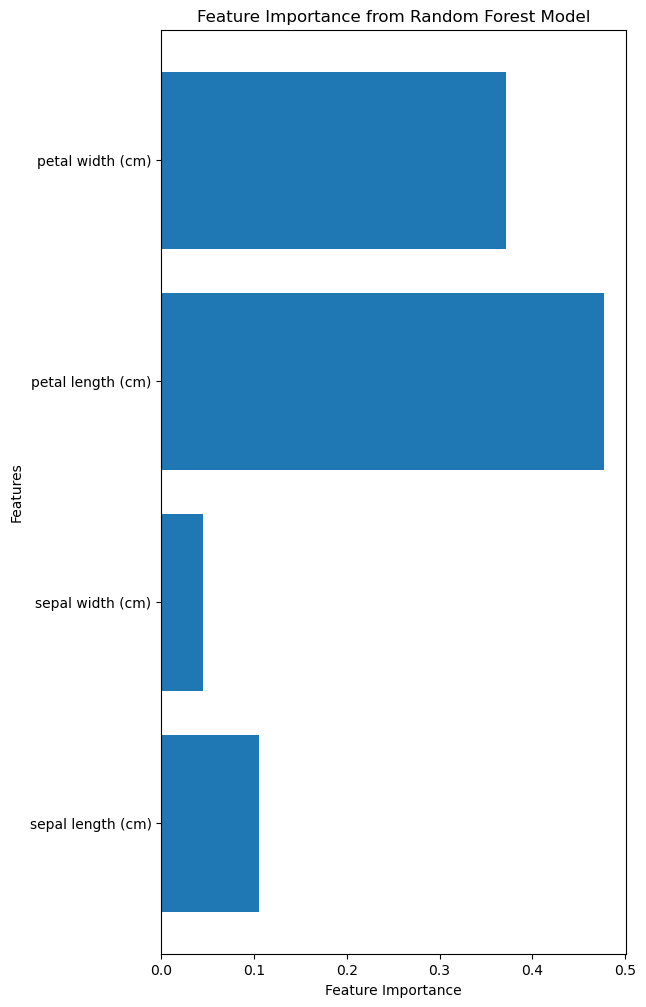

In [14]:
plt.figure(figsize=(6, 12))
plt.barh(X.columns, clf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Model')
plt.show()

We can scale these so that the maximum value is 1, making it easier to compare their relative importance

In [15]:
clf.feature_importances_ / max(clf.feature_importances_)

array([0.22176942, 0.09417707, 1.        , 0.77869107])